常见机器学习算法

1.依赖包

In [268]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # 画图
import numpy as np


2.构建房价数据集可视化

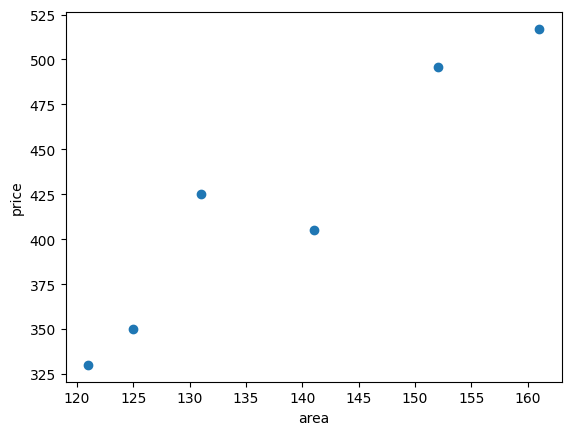

In [269]:
x = np.array([121,125,131,141,152,161]).reshape(-1,1)
y = np.array([330,350,425,405,496,517])
plt.scatter(x,y)
plt.xlabel('area')
plt.ylabel('price')
plt.show()

3.训练

In [270]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [271]:
w = lr.coef_ 
b= lr.intercept_
print(w,b)

[4.56111335] -211.2141992739007


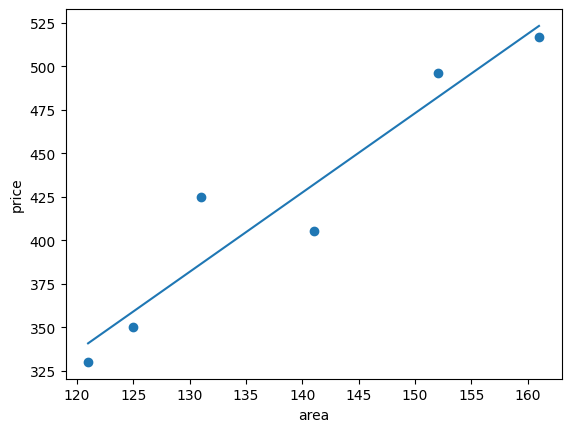

In [272]:
plt.scatter(x,y)
plt.xlabel("area")
plt.ylabel("price")
# x和y的范围
plt.plot([x[0],x[-1]],[x[0]*w+b,x[-1]*w+b])

5.模型预测

In [273]:
# sklearn要求输入是二维数组
textX=np.array([[130]])
lr.predict(textX)

array([381.73053651])

# 线性回归算法实现 扩展(自己实现)

1.导入依赖

In [274]:
import numpy as np
import matplotlib.pyplot as plt

2.定义函数计算梯度

In [275]:
def generate_gradient(X,theta,y):
    sample_count = X.shape[0]
    # 计算梯度
    return (1./sample_count) * X.T.dot(X.dot(theta)-y)

定义函数 读取数据集

In [276]:
def get_training_data(file_path):
    data = np.loadtxt(file_path,skiprows=1)
    cols = data.shape[1]
    return(data,data[:,:cols-1],data[:,cols-1:])

初始化参数

In [277]:
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count, 1)


梯度下降法

In [278]:
def gradient_descending(X,y,theta,alpha):
    Jthetas = [] # 记录代价函数J(θ)的值
    # 计算损失函数，等于真实值和预测值差的平方
    Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
    index = 0
    gradient = generate_gradient(X,theta,y)
    while not np.all(np.absolute(gradient)<=1e-5): #梯度小于0.00001时结束计算
        theta = theta - alpha * gradient
        gradient = generate_gradient(X,theta,y)
        # 计算损失函数，等于真实值和预测值差的平方
        Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
        if (index+1)%10 == 0:
            Jthetas.append((index,Jtheta[0]))
        index += 1
    return theta,Jthetas

定义函数，可视化损失函数变化曲线

In [279]:
# 展示损失函数变化曲线图
def show_Jthetas(diff_value):
    p_x = []
    p_y = []
    for (index,value) in diff_value:
        p_x.append(index)
        p_y.append(value)
    plt.plot(p_x,p_y)
    plt.xlabel("steps")
    plt.ylabel("J(θ)")
    plt.show()

定义函数,可视化数据点及拟合的曲线

In [280]:
def showlinercurve(theta,sample_training_set):
    x,y = sample_training_set[:,1],sample_training_set[:,2]
    z = theta[0]+theta[1]*x
    
    plt.scatter(x,y,color='b',marker='x',label="sample data")
    # 为什么要这样写？
    plt.plot(x,z,'r',color="r",label="regression curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("linear regression curve")
    plt.legend(loc='upper left')
    plt.show()

展示

1180
w:3.0076279423997594 b:1.668677412281192


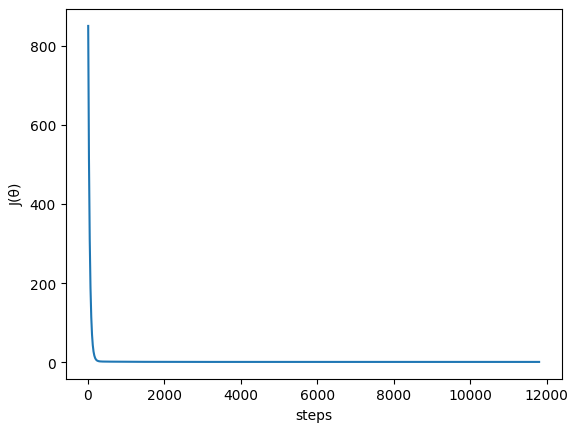

C:\Users\hwl的pc\AppData\Local\Temp\ipykernel_16272\861653783.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,z,'r',color="r",label="regression curve")


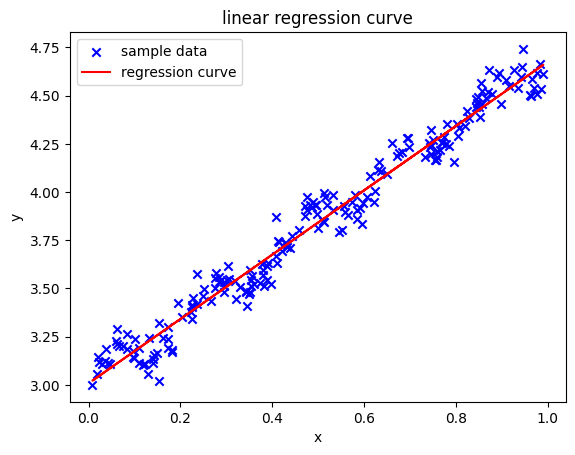

In [281]:
# 读取数据集
training_data_include_y,trainig_x,y=get_training_data("02/lr2_data.txt")
# 获取数据集数量及特征数
sample_count,feature_count = trainig_x.shape
# 定义学习步长(和lr有什么区别吗
alpha = 0.01
# 初始化
theta = init_theta(feature_count)
# 获取最终的参数theta及代价
result_data,Jthetas = gradient_descending(trainig_x,y,theta,alpha)
print(Jthetas.__len__())
# 打印参数
print("w:{}".format(result_data[0][0]),"b:{}".format(result_data[1][0]))
show_Jthetas(Jthetas)
showlinercurve(result_data,training_data_include_y)